In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# lets generate a dataset having class value as 0, and 1 only
def generateSample(n, prior, meanVariance):
    # generate a sample of size n from the prior
    # use the mean and variance of the prior to generate the sample
    # assuming gussian distribution of x having class value as 0 and x having class value as 1 are N(-1,1) and N(1,1) respectively 
    [class0Mean , class0Variance] = meanVariance[0]
    [class1Mean , class1Variance] = meanVariance[1]
    class0Sample = np.empty(0);
    class1Sample = np.empty(0);
    for i in range(1000):
      y=np.random.binomial(1,prior,1)
      if y==1:
        x=np.random.normal(class1Mean,class1Variance,1)
        class1Sample=np.append(class1Sample,x)
        # print(x)
      else:
        x=np.random.normal(class0Mean,class0Variance,1)
        class0Sample=np.append(class0Sample,x)
    # nows lets create dataframe for class0 and class1 with their generated samples values 
    # using padas dataframe
    size0=np.size(class0Sample)
    size1=np.size(class1Sample)
    data=np.concatenate((class0Sample,class1Sample),axis=0)
    df = pd.DataFrame(data)
    df['Class'] = np.concatenate((np.zeros(size0), np.ones(size1))).astype(int)
    df.columns=['X','Class']
    # shuffle the dataframe
    df = df.sample(frac=1).reset_index(drop=True)
    return df

# Using Synthetic Dataset
Assuming distribution of x having class value as 0 is nomal distribution with value mean and variance are 1,-1.
And distribution of x having class value as 1 is nomal distribution with value mean and variance are 1,1

In [ ]:
meanVariance = [[-1,1],[1,1]]
p0=0.5   # taking prior as 0.5
sample = generateSample(10000, p0,meanVariance)
sample

,X,Class
0,0.857902,1
1,-0.833213,1
2,0.508920,0
3,2.414475,1
4,-1.462843,0
...,...,...
995,-1.433750,0
996,2.389439,1
997,1.758461,1
998,1.502064,1


# Visualisation of synthetic data



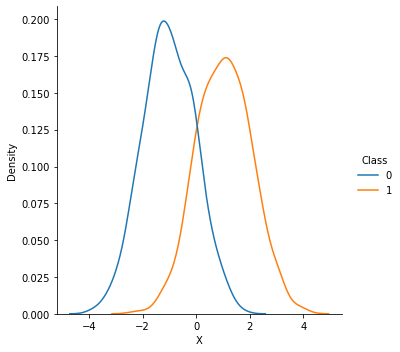

In [ ]:
# lets see the synthetic data is generated as expected

# plot the distribution of the data for each class on the same plot
sns.displot(sample, x="X", hue="Class", kind="kde")

# Creating Basian Classifier


In [ ]:
# partision the data into training and testing sets with a ratio of 0.8:0.2
# split the data into training and testing sets 
# using sklearn model_selection for split
X=np.array(sample.X)
Y=np.array(sample.Class)
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y, test_size=0.2, random_state=0)
print(X_train.shape)

(800,)


In [ ]:
# using GaussianNB
clf = GaussianNB()
y_pred = clf.fit(X_train.reshape(800,1), Y_train).predict(X_test.reshape(200,1))
print(classification_report(Y_test,y_pred))
print(confusion_matrix(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       105
           1       0.87      0.86      0.87        95

    accuracy                           0.88       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.88      0.87       200

[[93 12]
 [13 82]]


# Classifier with randomization
